# Import Python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate data for Univariate Decision Tree Regression

In [2]:
n = 100 #Number of observations in the training set

trueSplitPoint = 5 

trueLowerLevel = 15
trueUpperLevel = 30



In [3]:
x = np.random.uniform(0, 10, n)

def generateY(x, trueLowerLevel, trueUpperLevel, trueSplitPoint, sd):
    
    if x < trueSplitPoint:
        y = np.random.normal(trueLowerLevel, sd, 1)
    else:
        y = np.random.normal(trueUpperLevel, sd, 1)
        
    return y[0]

y = [generateY(i, trueLowerLevel, trueUpperLevel, trueSplitPoint, 3) for i in x]

In [4]:
data = pd.DataFrame({'X':x, 'Y':y}) #Put the two arrays into a dataframe to make it easy to work with
data.head(10) #Inspect the first ten rows of our dataset 

,X,Y
0,9.701683,30.927819
1,7.618556,30.736159
2,4.572114,12.845369
3,5.142518,32.198665
4,4.966570,18.501048
5,8.102828,27.678129
6,0.371426,12.520482
7,8.664975,33.794388
8,9.785477,29.627837
9,2.432104,19.029805


# Quickly plot the data so we know what it looks like

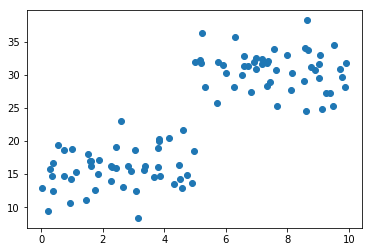

In [5]:
plt.scatter(data['X'], data['Y'])
plt.show()

Data appears to be generated by two distinct processes (as indeed it is). 

For the simplest version of decision tree we want to identify the split point. When predicting the (continuous) label for a new observation, if the feature is less than the split point we assign one value and if it's greater than the split point we assign another value. Thus the set of possible values we can assign has size two. Clearly this is a very simple regression technique and it's unlikely we'd use this in a real scenario, but we've generated the data in a very contrived way so that it should perform reasonably here and we'll see that the decision tree can approximate non-linear functions by using techniques such as Bagging.

Mathematically, we want to learn a function $f: \mathbb{R} \rightarrow \mathbb{R}$, such that:

\begin{equation}
  f(x)=\begin{cases}
    c_0, & \text{if $x<c_{split}$}.\\
    c_1, & \text{otherwise}.
  \end{cases}
\end{equation}

Our aim is to find the best combination of values for $c_0, c_1 \& c_{split}$

# How we're going to fit the model

We can't use a Maximum-Likelihood style approach because we don't make any probabilistic assumptions. We're going to test lots of split points, then for each split point we're calculate $c_0$ and $c_1$ by taking all of the points on the relevant side of the split point and calculating the mean of those points.

That is 

$$c_0|c_{split} = \frac{\sum_{x_i < c_{split}} x_i}{\sum_{x_i < c_{split}} 1}$$

$$c_1|c_{split} = \frac{\sum_{x_i > c_{split}} x_i}{\sum_{x_i > c_{split}} 1}$$


And then we'll choose the values of $c_0, c_1 \text{and} c_{split}$ which minimise the squared error on the training set

In [6]:
class univariateDecisionTree:
    
    def __init__(self, data, target, feature, trainTestRatio = 0.9):
        #data - a pandas dataset 
        #target - the name of the pandas column which contains the true labels
        #feature - the name of the pandas column which we will use to do the regression
        #trainTestRatio - the proportion of the entire dataset which we'll use for training
                    #   - the rest will be used for testing
        
        self.target = target
        self.feature = feature
        
        #Split up data into a training and testing set
        self.train, self.test = train_test_split(data, test_size=1-trainTestRatio)
        
        
        #Generate mesh of split points to try. We want the mesh to be of a decent size (say 1000 points)
        #Think about what reasonable end points of the mesh would be - what would happen if we considered
        #a point that was smaller than the smallest point in the training set as a split point?
        
        #np.linspace() is a good function for constructing this 1-d mesh
        meshMin = np.min(self.train[self.feature])
        meshMax = np.max(self.train[self.feature])
        self.splitPointMesh = np.linspace(meshMin, meshMax, 1000)
        
    
    def computeMeansGivenSplitPoint(self, splitPoint):
        #Given a split point, we want to split the training set in two
        #One containing all the points below the split point and one containing all the points above the split point
        #The means are then the means of the targets in those datasets and they are the values we want to return
        
        #Hint: When using pandas datasets, you can use the .loc command to easily extract a subset of the dataframe
        
        #Remember we want to return two values
    
    def computeSquaredError(self, splitPoint):
        #Once we have a split point and a set of means, we need to have some way of identifying whether it's 
        #a good split point or not
        
        #First apply compuuteMeansGivenSplitPoint to get the values for above and below the dataset
        #Then compute the sum of squared errors yielded by assigning the corresponding mean to each point in the training set
        #If we add these two sums of squares together then we have a single error number which indicates how good our split point is
        
        
        #Code goes here...
        
        
        #To get the value of errorBelow, subset the training set to the points below the split points
        #Then calculate the squared difference between target and c0 for each observation in the subset
        #Then sum them up (This can all be done in one line)
        
        
        #Code goes here...
        
        
        totalError = errorBelow + errorAbove

        return totalError
    
    
    def fitDT(self):
        #Calculate the squared error for each split point in the mesh, 
        #and save the values (splitPoint and two means) obtained by the best one
            
        #Errors for each member of the mesh
        
        
        #Find the member of the mesh which gives the smallest error
        
        
        #Save as attributes of the class the split point and two means which give the smallest error
        
        
        
        return 0
    
    def predict(self, X):
        #If below the split point, predict one value. If above the split point, predict the other
            
        pass
        
            

In [7]:
myModel = univariateDecisionTree(data, 'Y', 'X')

In [8]:
myModel.fitDT()

0

# Now lets see what the results look like

We'll plot the regression line we obtained against the values we observed in the training set

In [9]:
regLine = myModel.predict(myModel.splitPointMesh)

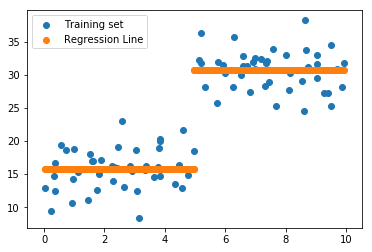

In [10]:
plt.scatter(myModel.train[myModel.feature], myModel.train[myModel.target], label = 'Training set')
plt.scatter(myModel.splitPointMesh, regLine, label = 'Regression Line')
plt.legend()
plt.show()
